In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [17]:
 
base_dir = '/kaggle/input/dogs-vs-cats/train'
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
def plot_image_from_directory(directory_path,class_animal,num_images=9):
  image_filenames=os.listdir(directory_path)
  if len(image_filenames)<num_images:
    print(f"Only found {len(image_filenames)} images in {directory_path},displaying then all.")
    num_images=len(image_filenames)
  selected_images=random.sample(image_filenames,num_images)
  fig,axes=plt.subplots(3,3,figsize=(10,10))
  axes=axes.ravel()
  for i ,image_file in enumerate(selected_images):
    image_path=os.path.join(directory_path,image_file)
    image=Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(class_animal)
    axes[i].axis('off')
  plt.tight_layout()
  plt.show()

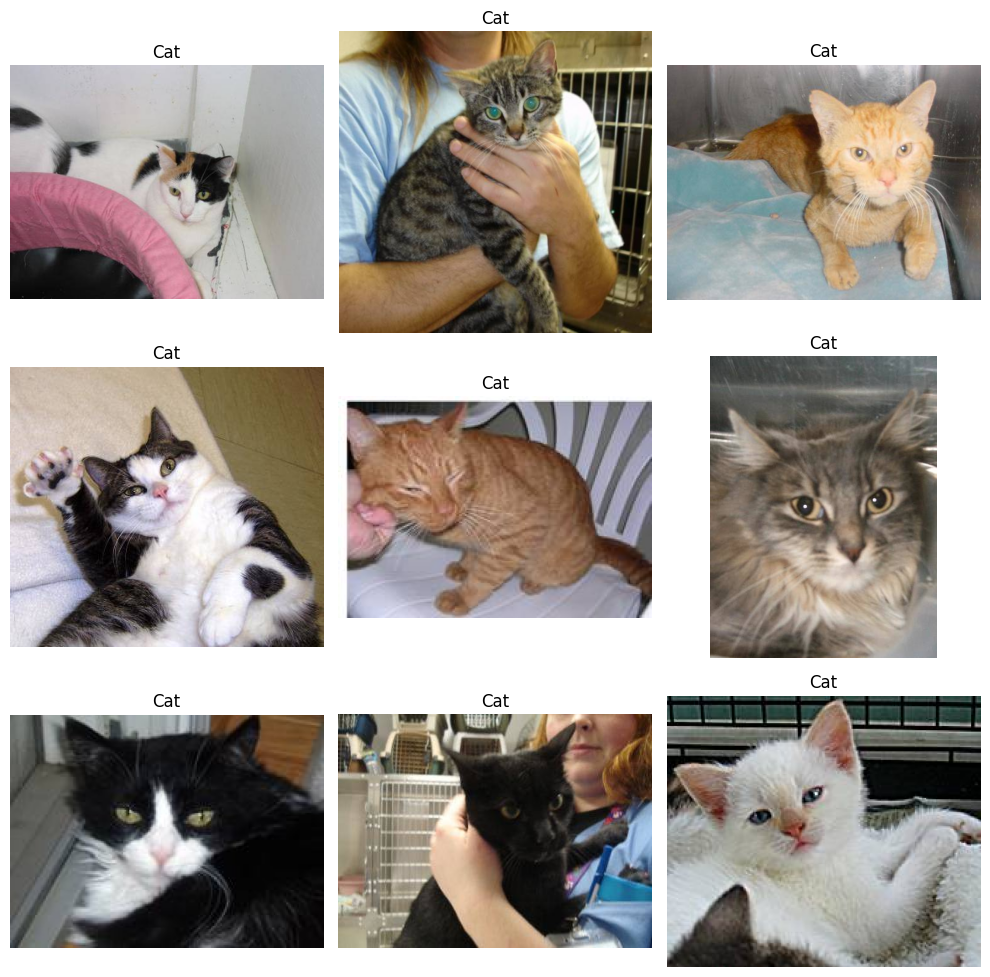

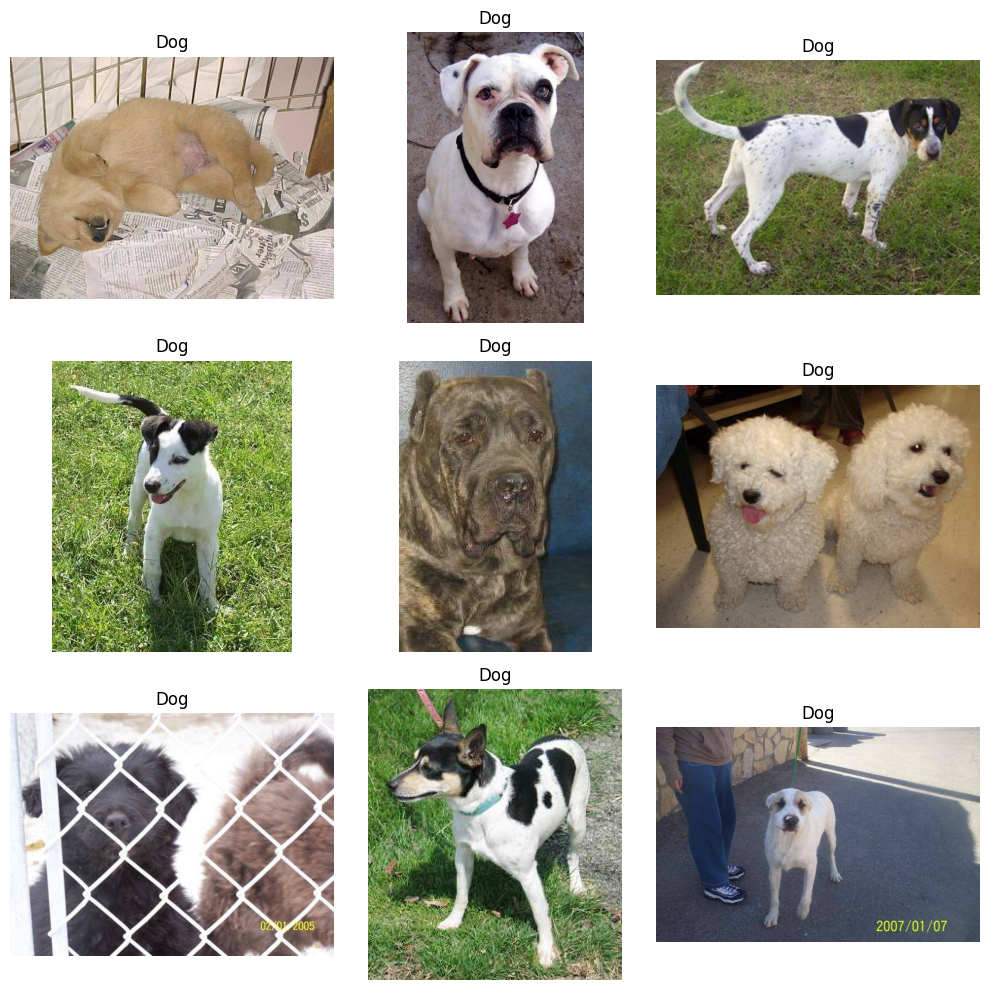

In [20]:
# Display some sample images
plot_image_from_directory(cat_dir, class_animal='Cat')
plot_image_from_directory(dog_dir, class_animal='Dog')

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir, target_size=(150, 150), batch_size=20, class_mode='binary', subset='validation')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [28]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 58s 68ms/step - accuracy: 0.5550 - loss: 0.7213 - val_accuracy: 0.6030 - val_loss: 0.6339
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.6937 - loss: 0.5795 - val_accuracy: 0.7473 - val_loss: 0.5105
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 12us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.7892 - loss: 0.4477 - val_accuracy: 0.7890 - val_loss: 0.4571
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.8282 - loss: 0.3670 - val_accuracy: 0.7862 - val_loss: 0.4638
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 46ms/step - accuracy: 0.9022 - loss: 0.2297 - val_accuracy: 0.7945 - val_loss: 0.4985
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 13us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dogs-vs-cats/test', target_size=(150,150), batch_size=20, class_mode='binary', shuffle=False)


Found 5000 images belonging to 2 classes.


250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step


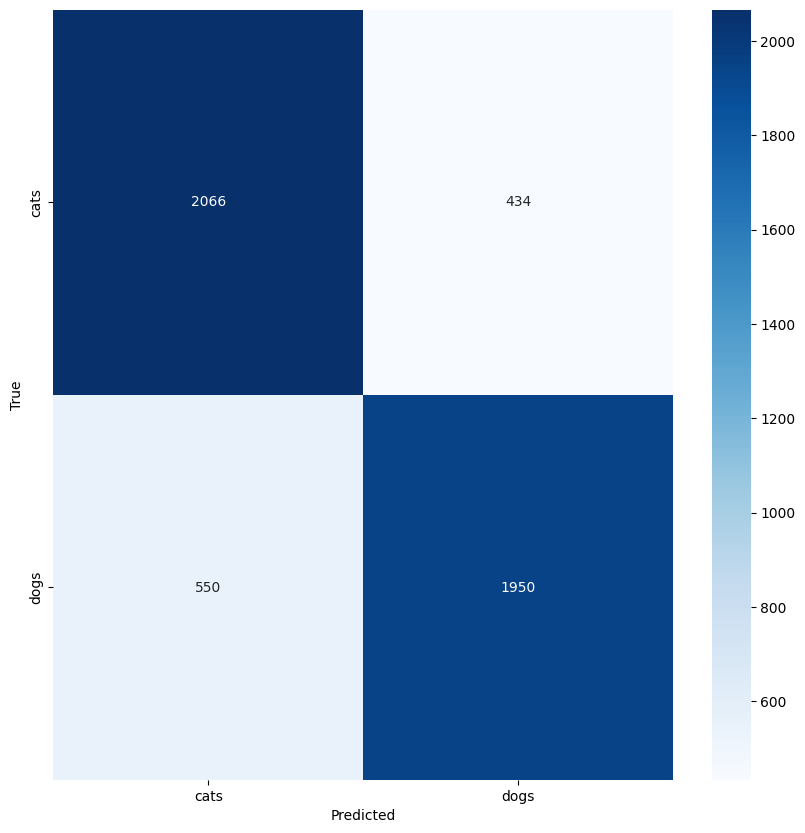

In [33]:
# Predictions
probabilities = model.predict(test_generator)
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
# Misclassified samples
misclassified_indices = np.where(predicted_classes != true_classes)[0]
print(f"Total misclassified samples: {len(misclassified_indices)}")

Total misclassified samples: 984


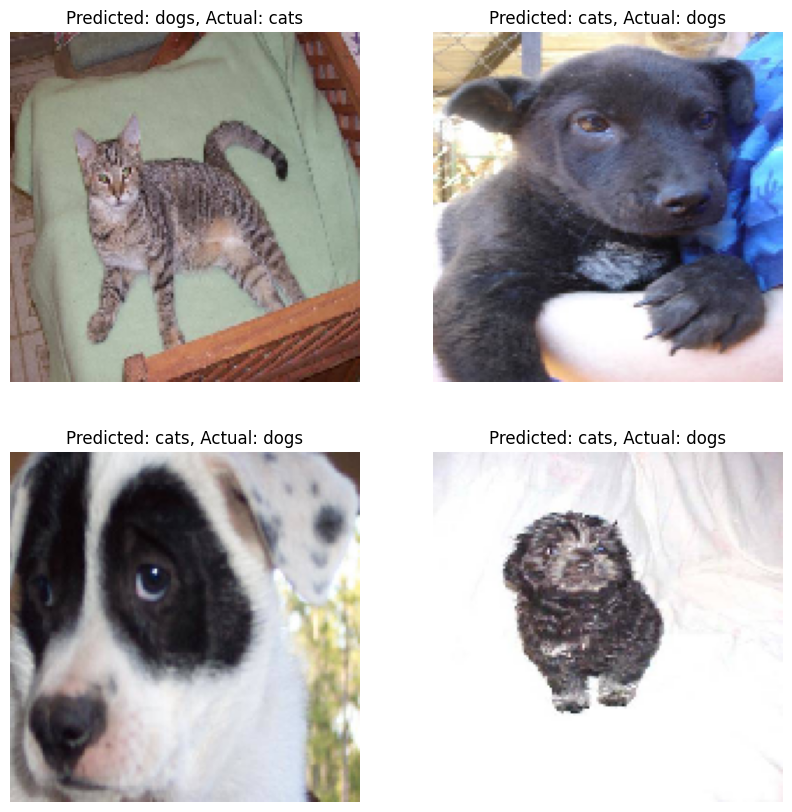

In [36]:
# Display misclassified images
num_samples = 4
random_indices = random.sample(list(misclassified_indices), min(num_samples, len(misclassified_indices)))

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    img_path = os.path.join('/kaggle/input/dogs-vs-cats/test', test_generator.filenames[idx])
    img = load_img(img_path, target_size=(150, 150))
    
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_classes[idx]]}, Actual: {class_labels[true_classes[idx]]}')
    plt.axis('off')

plt.show()